PARTICLE ID:
4513357793067008
Num hits: 12

hit id: 13225. Absolute momentum: 1.996659271220305
hit id: 16244. Absolute momentum: 1.9974412767462677
hit id: 18992. Absolute momentum: 1.9996748254216234
hit id: 26542. Absolute momentum: 1.998935060676059
hit id: 33450. Absolute momentum: 1.9983057735863372
hit id: 64084. Absolute momentum: 1.987574368084123
hit id: 65318. Absolute momentum: 1.9883355794646436
hit id: 66581. Absolute momentum: 1.9884243162877209
hit id: 67883. Absolute momentum: 1.9894800320679495
hit id: 69291. Absolute momentum: 1.991644223221015
hit id: 70842. Absolute momentum: 1.9925011484518804
hit id: 70865. Absolute momentum: 1.9924281254196752


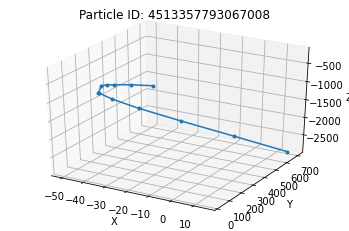

In [2]:


#Row in particle file
n=100

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Filename for event
event_id = 'event000001000'
# "All methods either take or return pandas.DataFrame objects"
#hits, cells, particles, truth = load_event('../train_sample/train_100_events/'+event_id)
fn='../train_sample/train_100_events/'+event_id

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

A=np.loadtxt("../input/"+fn+"-truth.csv",skiprows=1,delimiter=',')
B=np.loadtxt("../input/"+fn+"-particles.csv",skiprows=1,delimiter=',')


#particle id to nth row in particle file.
part_id = B[n,0]

#Find hits from particle.
hits_from_part = np.argwhere(A[:,1]==part_id)[:,0]

#Print particle id and number of hits found.
print("PARTICLE ID:")
print(int(part_id))
print("Num hits: " + str(len(hits_from_part)))
print("")
#Get coordinates from hit-data.
coords = np.zeros((len(hits_from_part),3))
for i in range(0,len(hits_from_part)):
	coords[i,:] = A[hits_from_part[i],2:5]
	print("hit id: "+str(int(A[hits_from_part[i],0]))+ ". Absolute momentum: " + str(np.sqrt(np.sum(A[hits_from_part[i],5:8]**2))))
	
#Sort coordinates by z-component.	
idx = np.argsort(coords[:,2])
coords2=coords[idx]

#Plot
ax.plot(coords2[:,0],coords2[:,1],coords2[:,2],'.-')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Particle ID: " +str(int(part_id)))
plt.show()